In [38]:
import numpy as np 
import pandas as pd 

import seaborn as sns 
import matplotlib.pyplot as plt


In [39]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error




In [40]:
boston = pd.read_csv('BostonHousing.csv')

In [4]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,Price
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [27]:
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         5
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

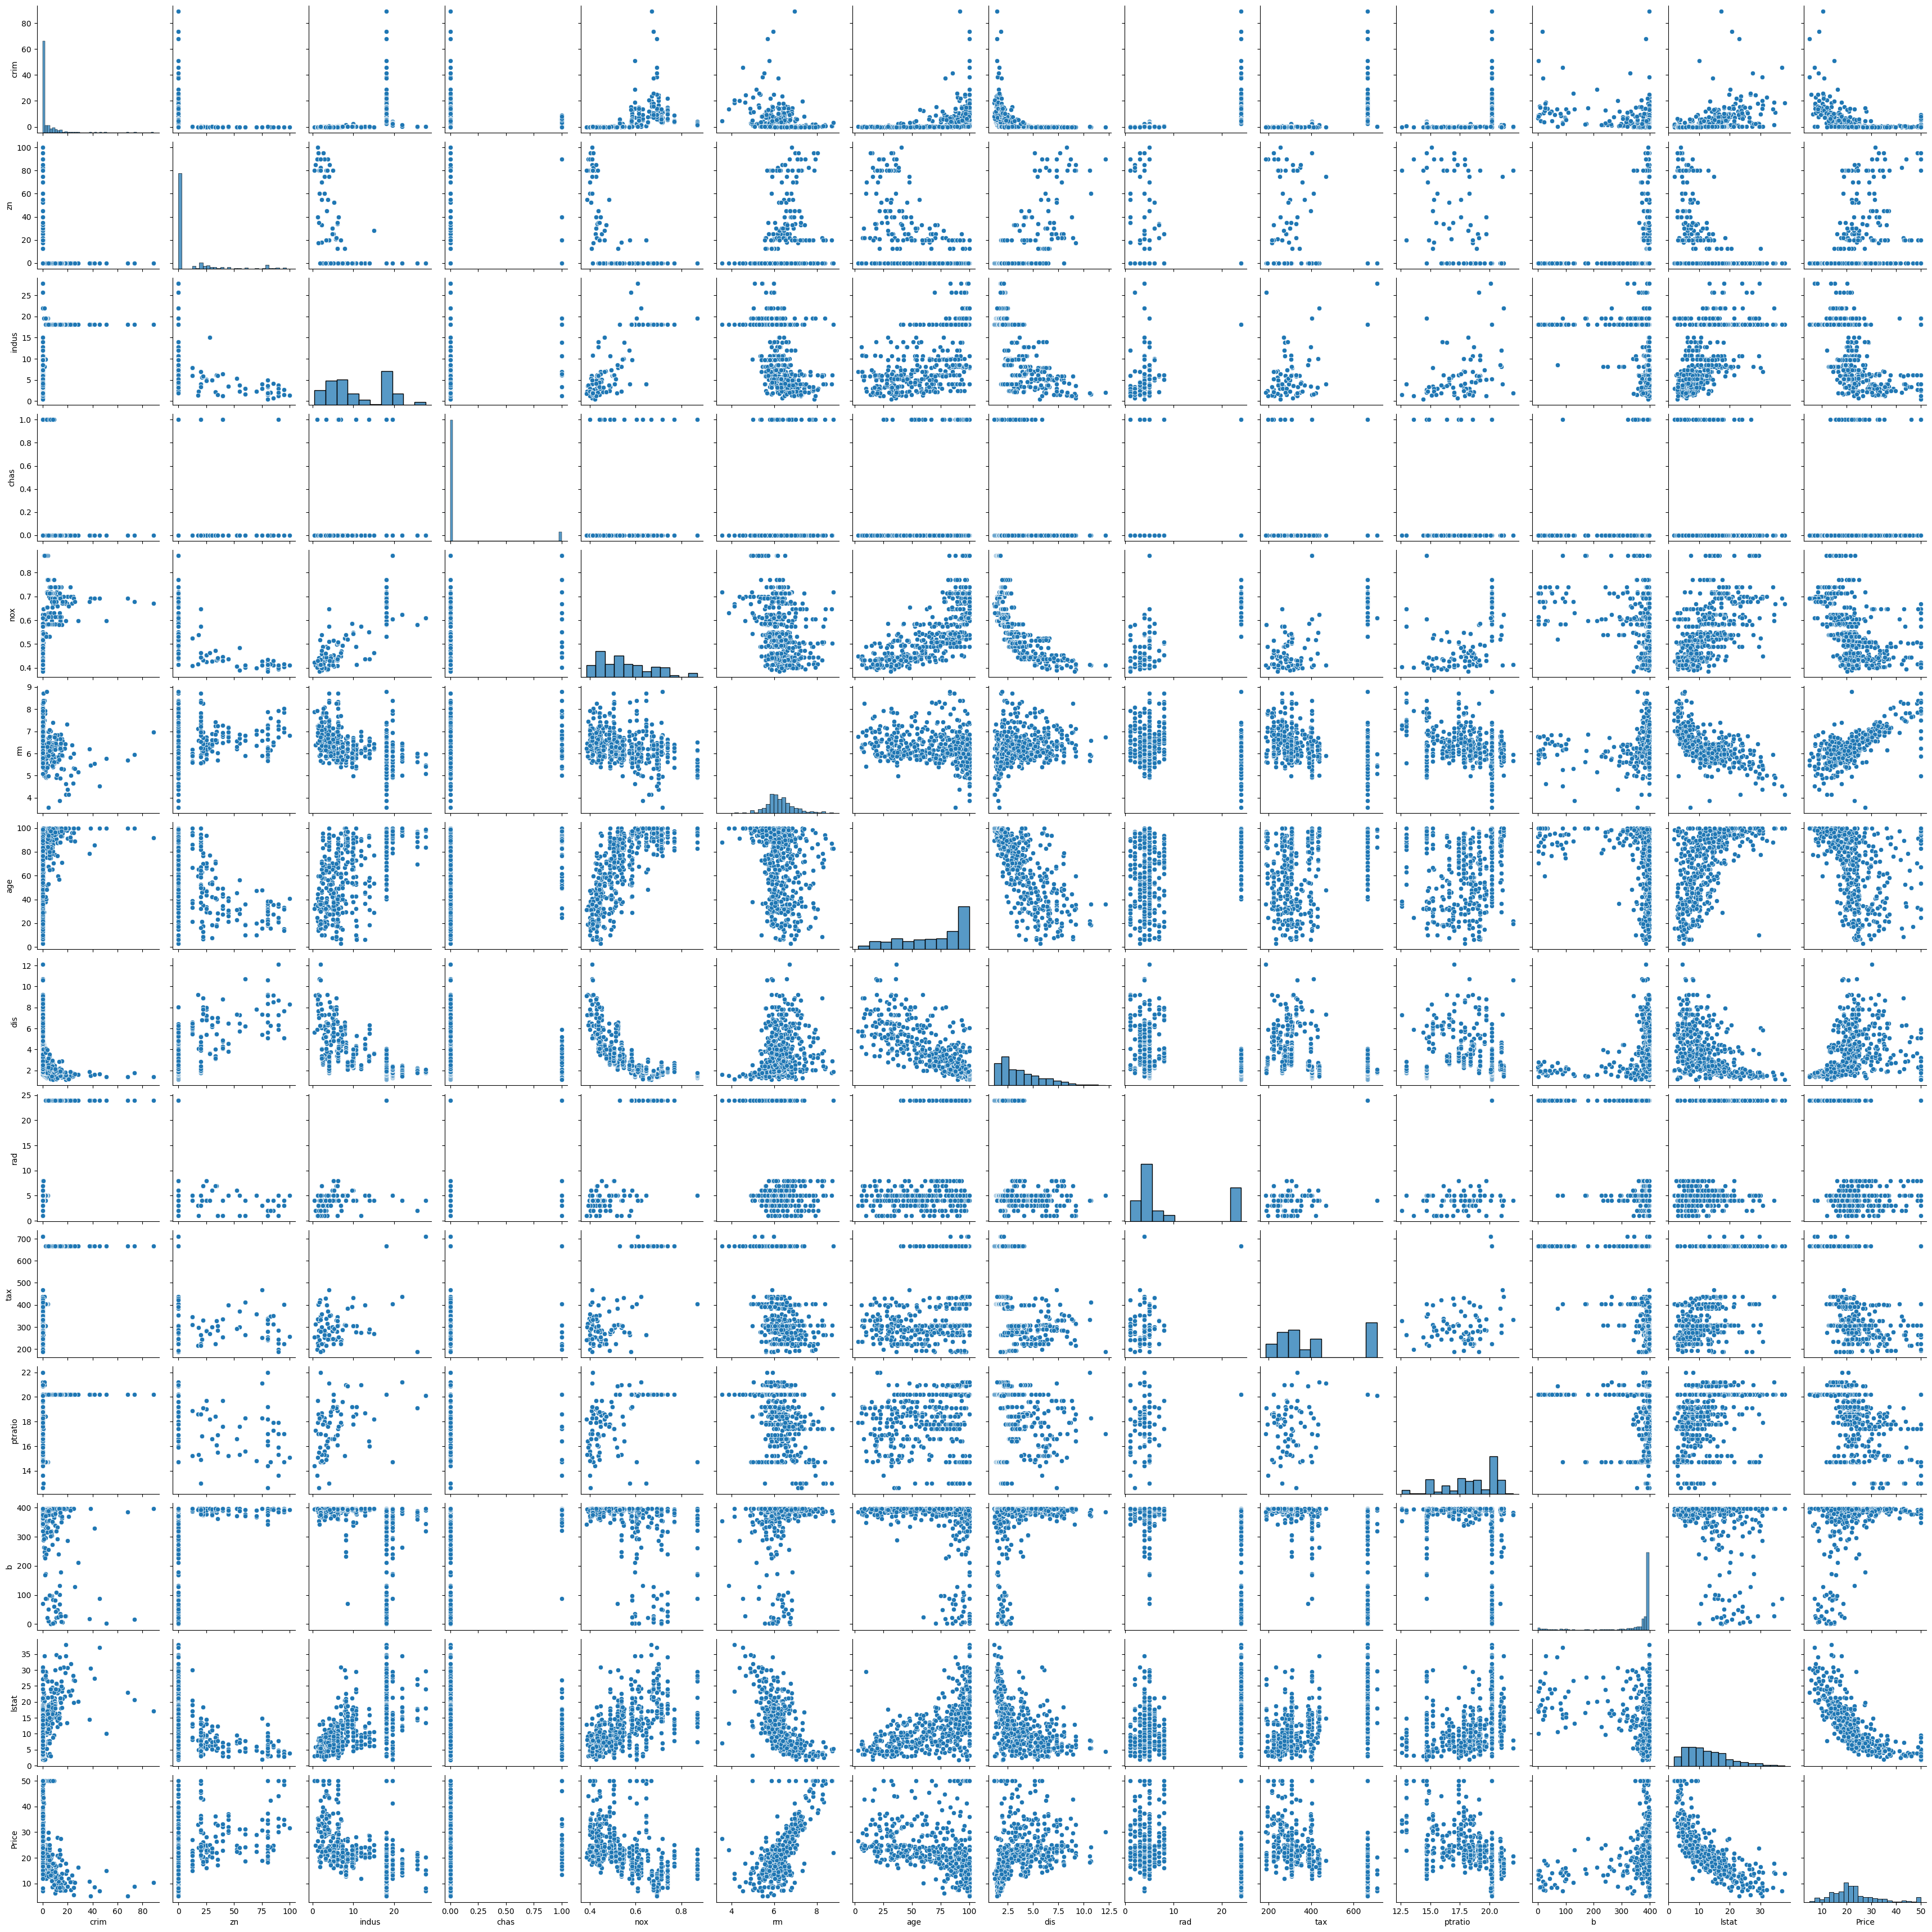

In [28]:
sns.pairplot(boston)

In [6]:
boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'b', 'lstat', 'Price'],
      dtype='object')

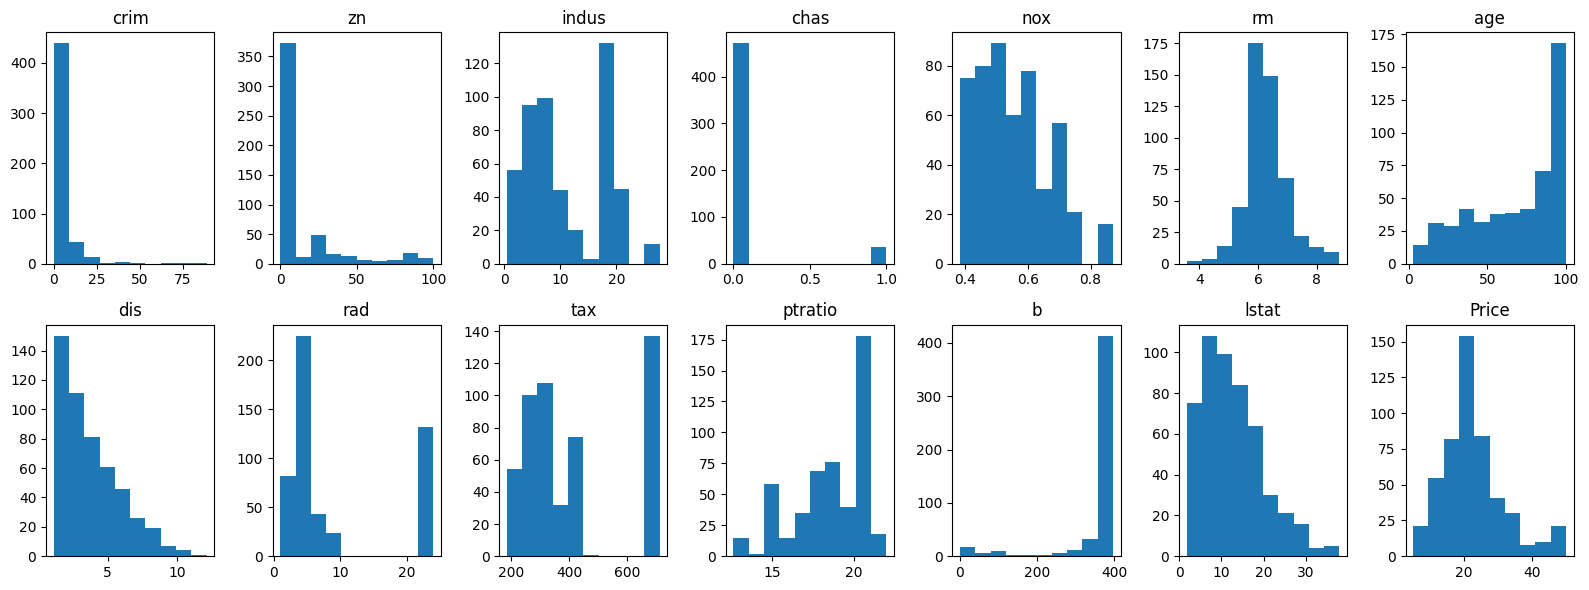

In [13]:
rows = 2
cols = 7

fig, ax = plt.subplots(nrows = rows, ncols = cols,
                       figsize = (16,6))

col = boston.columns
index = 0

for i in range(rows):
    for j in range(cols):
        ax[i][j].hist(boston[col[index]])
        ax[i][j].set_title(col[index])

        index = index +1
        
        
plt.tight_layout()
plt.show()

In [7]:
corrmat  = boston.corr()

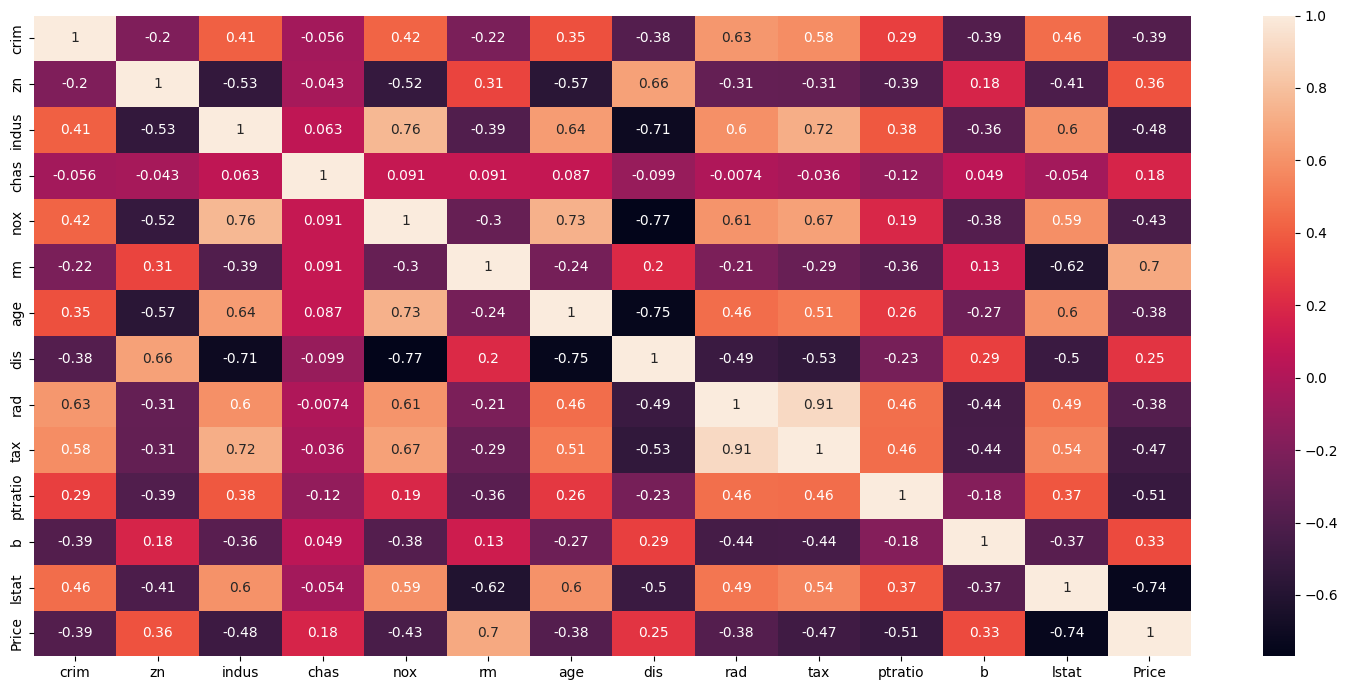

In [15]:
plt.subplots(figsize = (15,7))
sns.heatmap(corrmat, annot = True, annot_kws = {'size':10})
plt.tight_layout()
plt.show()


In [43]:
X = boston.drop(['Price'],axis = 1)
X.head()


,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33


In [42]:
boston.fillna({'rm': boston['rm'].mean()}, inplace=True)
boston.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
b          0
lstat      0
Price      0
dtype: int64

In [44]:
y = boston['Price']

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=0)

In [46]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((404, 13), (102, 13), (404,), (102,))

In [47]:
model = LinearRegression()
model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [48]:
y_predict = model.predict(X_test)

In [49]:
from sklearn.metrics import r2_score

In [50]:
r2_score(y_test, y_predict)

0.5890259426012647

In [51]:
mean_absolute_error(y_test, y_predict)

3.844212514619602

In [52]:
mean_squared_error(y_test, y_predict)

33.464975988914404

In [53]:
np.sqrt(mean_squared_error(y_test, y_predict))

np.float64(5.784892046435647)

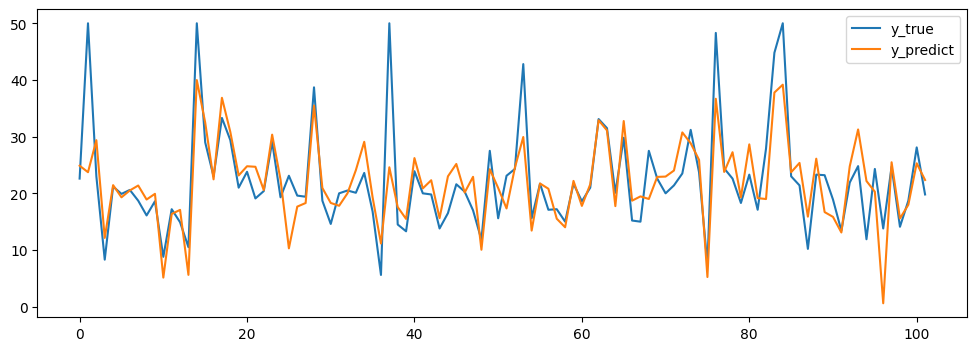

In [54]:
plt.subplots(figsize = (12,4))
x_points = list(range(len(y_test)))
plt.plot(x_points, y_test, label = 'y_true')
plt.plot(x_points, y_predict, label = 'y_predict')
plt.legend()
plt.show()

In [55]:
from sklearn.model_selection import learning_curve, ShuffleSplit

In [62]:
def plot_learning_curve(estimator, title, X,y, ylim = None, cv= None,
                        train_size = np.linspace(0.1, 1, 10)):
    
    plt.figure()
    plt.title(title)
    plt.xlabel('Training Examples')
    plt.ylabel('score')
    
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv = cv, train_sizes = train_size)
    
    train_scores_mean = np.mean(train_scores,axis = 1)
    train_scores_std = np.std(train_scores, axis = 1)
    
    test_scores_mean = np.mean(test_scores,axis = 1)
    test_scores_std = np.std(test_scores, axis = 1)
    
    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, 
                     train_scores_mean + train_scores_std, alpha = 0.4, color = 'red')
    
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, 
                     test_scores_mean + test_scores_std, alpha = 0.4, color = 'green')
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color = 'r', label = 'Training Score')
    plt.plot(train_sizes, test_scores_mean, 'o-', color = 'g', label = 'Test Score')
    
    plt.legend(loc = 'best')
    
    return  plt

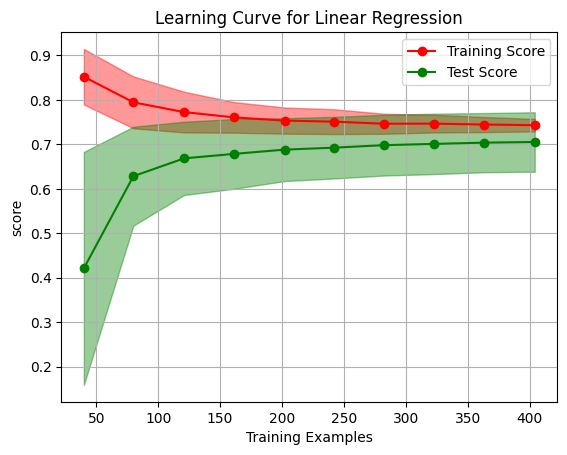

In [63]:
title = 'Learning Curve for Linear Regression'
cv = ShuffleSplit(n_splits=100, test_size=0.2, random_state=0)
model = LinearRegression()
plot_learning_curve(model, title, X, y, ylim = (0.7, 1.01), cv = cv)
plt.show()